In [1]:
import ROOT
import numpy as np
import pandas as pd
import time
import printColor as pc
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from celluloid import Camera
from moviepy.editor import *
from matplotlib import gridspec
import scipy.stats as stats


color = pc.bcolors()

ROOT.ROOT.EnableImplicitMT()

def importROOT(filename):
	f = ROOT.TFile.Open(filename, "read")
	Hit = f.Get("Hit")
	dataTrack, columnsTrack = Hit.AsMatrix(return_labels=True)
	track = pd.DataFrame(data=dataTrack, columns=columnsTrack)
	#print(track)
	return(track)

track = importROOT("~/data/g2wd10k.root")
eID = track['eventID']
eID = eID.drop_duplicates()
eIDNum = len(eID)

print(len(track))
eIDNum = range(eIDNum)
timeWinTotal = 60e-6 # s
binNum = 5e-9 # s
timeWinNum = int(timeWinTotal / binNum)



print(timeWinNum)
timeNum = range(timeWinNum)
dfMuonPos = pd.DataFrame([])
BinRange = range(timeWinNum)
for j in timeNum:
    dfMuonPosTemp = track[(track['hitTime'] >= j*5e-3) & (track['hitTime'] < j*5e-3+5e-3)] 
    dfMuonPosTemp['timeBin'] = j
    if (j % 1000 ==0):
        print(j)
    dfMuonPosTemp = dfMuonPosTemp[['eventID', 'hitTime' , 'hitPosX', 'hitPosY' ,'hitPosZ','hitPMag','hitR','eDep','hitAngle','VolID','timeBin']]
    dfMuonPos = pd.concat([dfMuonPos, dfMuonPosTemp])
#print(dfMuonPos)

Welcome to JupyROOT 6.18/04
 start : color class is imported.. 
222974
12000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


[1.33892659 0.47594426 1.96333634 ... 0.5694039  0.42386789 1.92323893]
range(0, 69)
        eventID     hitPosX     hitPosY    hitPosZ  VolID  timeBin   hitTime  \
139222   6298.0  281.923607   43.639848  23.733167    1.0       41  0.207809   
139223   6298.0  246.880304   79.164811  45.915426    2.0       80  0.401256   
27013    1263.0 -274.855133  -88.254384  34.574283   22.0       46  0.234630   
12898     608.0 -284.117921    1.000000 -27.662810   20.0       49  0.247879   
12899     608.0 -276.285655  -42.746884 -53.915253   21.0       88  0.440068   
...         ...         ...         ...        ...    ...      ...       ...   
121870   5529.0   36.620266 -237.603710  24.986405   31.0       98  0.492700   
135634   6139.0   83.762259  254.557657 -14.261268    8.0       98  0.493785   
166504   7513.0  109.330178  212.369868 -33.035821    7.0       98  0.490646   
142393   6444.0  -42.656709 -275.716315  25.546713   29.0       99  0.497200   
177765   8010.0  -88.697978  269.74

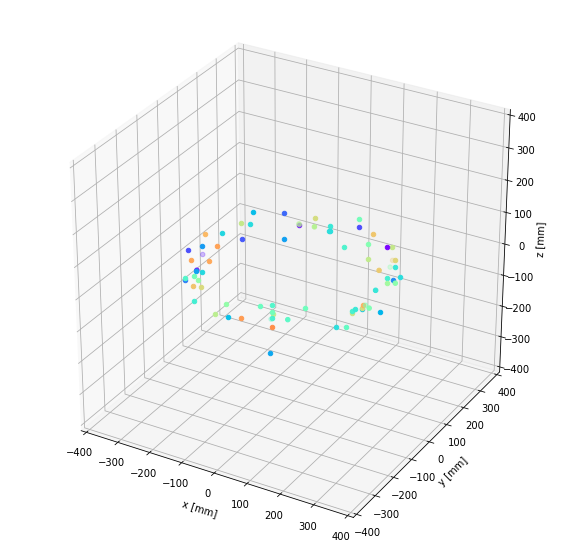

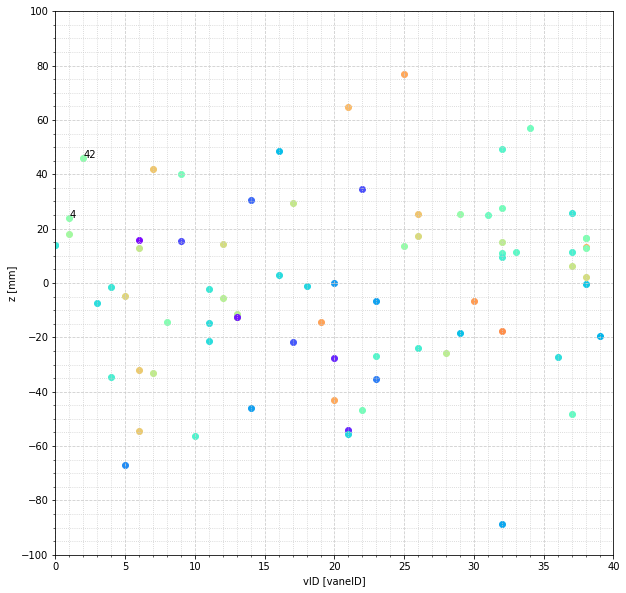

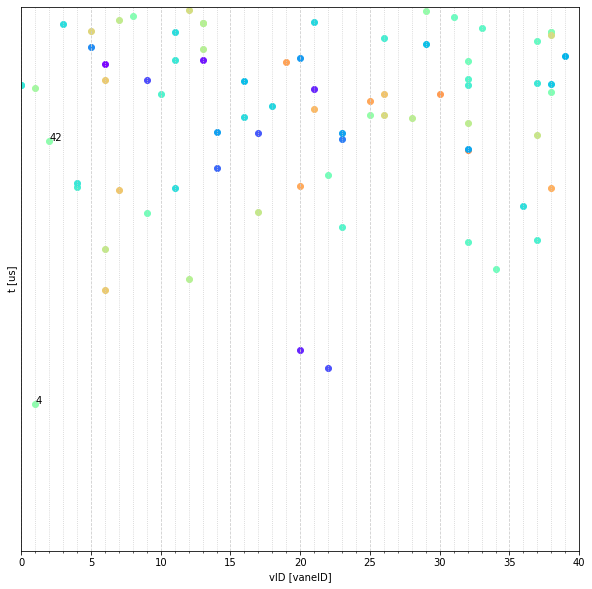

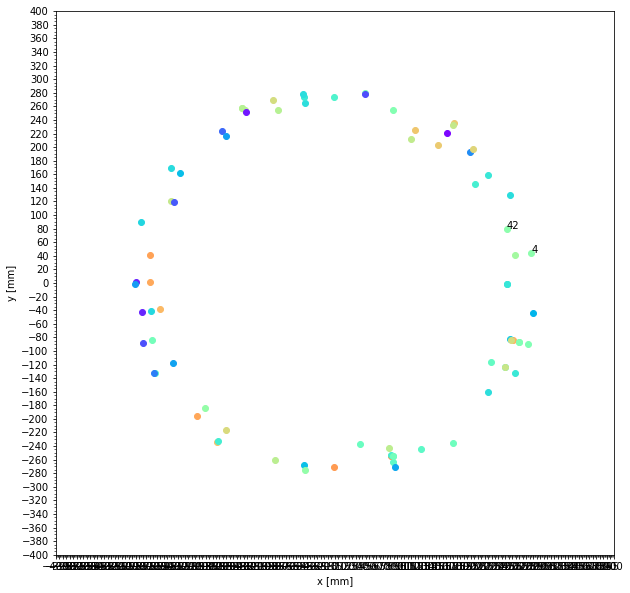

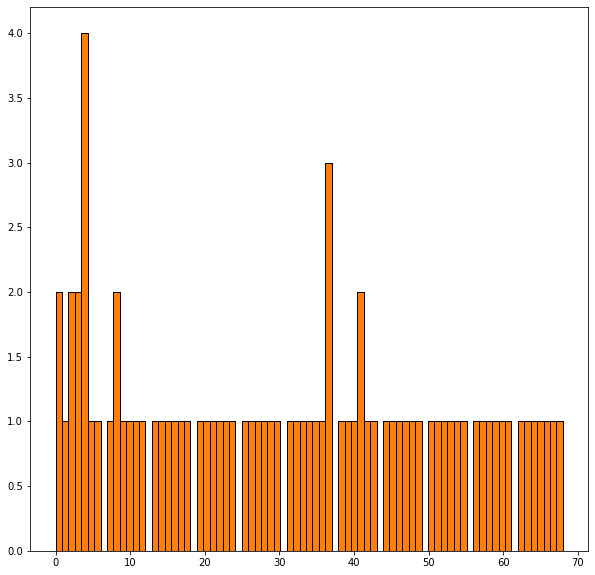

In [44]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
winMin = 0
winMax = 100
timeMin = winMin*5e-3
timeMax = winMax*5e-3
n = 400000
cmin, cmax = 0, 2
color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])
import itertools
print(color)
testPlot = dfMuonPos[(dfMuonPos["timeBin"] > winMin) & (dfMuonPos["timeBin"] < winMax)]
testPlotEveID = testPlot["eventID"]
testPlotEveID = testPlotEveID.drop_duplicates()
trEID = range(len(testPlotEveID))
#print(trEID)
dfPosiPlot = pd.DataFrame([])
y = np.array(list(itertools.chain.from_iterable([ [i+1 for j in range(0, 303//2)] for i in range(0, 3)])))
y = y.reshape(-1, 1)
#c_lst = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, len(set(testPlot['hitPosX'])))]
c_lst = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, 12000)]

fig1 = plt.figure(1, figsize =(10 , 10))
fig2 = plt.figure(2, figsize =(10 , 10))
fig3 = plt.figure(3, figsize =(10 , 10))
fig4 = plt.figure(4, figsize =(10 , 10))
fig5 = plt.figure(5, figsize =(10 , 10))
pos3D = fig1.add_subplot(111, projection='3d')
pos2DVZ = fig2.add_subplot()
pos2DVT = fig3.add_subplot()
pos2DXY = fig4.add_subplot()
hist = fig5.add_subplot()

pos3D.set_xlabel('x [mm]')
pos3D.set_ylabel('y [mm]')
pos3D.set_zlabel('z [mm]')
pos3D.set_xlim( -400,400)
pos3D.set_ylim( -400,400)
pos3D.set_zlim(-400,400)

pos2DVZ.set_xlabel('vID [vaneID]')
pos2DVZ.set_ylabel('z [mm]')
pos2DVZ.set_xlim(0,40)
pos2DVZ.set_ylim(-100,100)
pos2DVZ.xaxis.set_major_locator(MultipleLocator(5))
pos2DVZ.yaxis.set_major_locator(MultipleLocator(20))
# Change minor ticks to show every 5. (20/4 = 5)
pos2DVZ.xaxis.set_minor_locator(AutoMinorLocator(5))
pos2DVZ.yaxis.set_minor_locator(AutoMinorLocator(4))


pos2DVT.set_xlabel('vID [vaneID]')
pos2DVT.set_ylabel('t [us]')
pos2DVT.set_xlim(0,40)
pos2DVT.set_ylim(timeMin,timeMax)
pos2DVT.xaxis.set_major_locator(MultipleLocator(5))
pos2DVT.yaxis.set_major_locator(MultipleLocator(20))
# Change minor ticks to show every 5. (20/4 = 5)
pos2DVT.xaxis.set_minor_locator(AutoMinorLocator(5))
pos2DVT.yaxis.set_minor_locator(AutoMinorLocator(4))

pos2DXY.set_xlabel('x [mm]')
pos2DXY.set_ylabel('y [mm]')
pos2DXY.set_xlim(-400,400)
pos2DXY.set_ylim(-400,400)
pos2DXY.xaxis.set_major_locator(MultipleLocator(5))
pos2DXY.yaxis.set_major_locator(MultipleLocator(20))
# Change minor ticks to show every 5. (20/4 = 5)
pos2DXY.xaxis.set_minor_locator(AutoMinorLocator(5))
pos2DXY.yaxis.set_minor_locator(AutoMinorLocator(4))



# Turn grid on for both major and minor ticks and style minor slightly
# differently.
pos2DVZ.grid(which='major', color='#CCCCCC', linestyle='--')
pos2DVZ.grid(which='minor', color='#CCCCCC', linestyle=':')
pos2DVT.grid(which='major', color='#CCCCCC', linestyle='--')
pos2DVT.grid(which='minor', color='#CCCCCC', linestyle=':')

for i,j in enumerate(testPlotEveID):
    #print(i)
    #print(j)
    testPlotTemp = testPlot[(testPlot["eventID"] == j)]
    color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])
    testPlotTemp = testPlotTemp[['eventID', 'hitPosX', 'hitPosY', 'hitPosZ','VolID','timeBin','hitTime']]
    testPlotTemp["c"] = i
    #print(j)
    #print (testPlotTemp["hitTime"])
    pos3D.scatter(testPlotTemp["hitPosX"],testPlotTemp["hitPosY"],testPlotTemp["hitPosZ"], color=c_lst[int(j)])
    pos2DVZ.scatter(testPlotTemp["VolID"],testPlotTemp["hitPosZ"], color=c_lst[int(j)])
    pos2DVT.scatter(testPlotTemp["VolID"],testPlotTemp["hitTime"], color=c_lst[int(j)])
    pos2DXY.scatter(testPlotTemp["hitPosX"],testPlotTemp["hitPosY"], color=c_lst[int(j)])
    dfPosiPlot = pd.concat([dfPosiPlot, testPlotTemp])
    #print(dfPosiPlot)
    #print(testPlotTemp)
print(dfPosiPlot)
n = dfPosiPlot["c"].values
hitTimes = dfPosiPlot["hitTime"].values
volIDs = dfPosiPlot["VolID"].values
zS = dfPosiPlot["hitPosZ"].values
yS = dfPosiPlot["hitPosY"].values
xS = dfPosiPlot["hitPosX"].values
histNum = len(n)
hist = plt.hist(n, bins = histNum, range =(n.min(), n.max()), edgecolor = 'black')
ys, xs, patches = plt.hist(n, bins = histNum, range =(n.min(), n.max()), edgecolor = 'black')
#print(ys)
#print(xs)
xHits = []
for i,j in enumerate(range(0, len(ys))):
    #print(ys[i])
    if(ys[i] >= 3):
        xHits.append(j)
print(xHits)

for i, txt in enumerate(xHits):
    print(i)
    pos2DXY.annotate(txt, (xS[i], yS[i]))
for i, txt in enumerate(xHits):
    pos2DVT.annotate(txt, (volIDs[i], hitTimes[i]))
for i, txt in enumerate(xHits):
    pos2DVZ.annotate(txt, (volIDs[i], zS[i]))
trackS = dfPosiPlot["c"]
hitS = dfPosiPlot["hitPosX"]
trackS = trackS.drop_duplicates()
print(len(trackS))
print(len(hitS))
#print(testPlot)
#pos.scatter(dfPosiPlot["hitPosX"],dfPosiPlot["hitPosY"],dfPosiPlot["hitPosZ"],  c=color, cmap='hot' )

plt.show()